# Visualization of the grid of chords

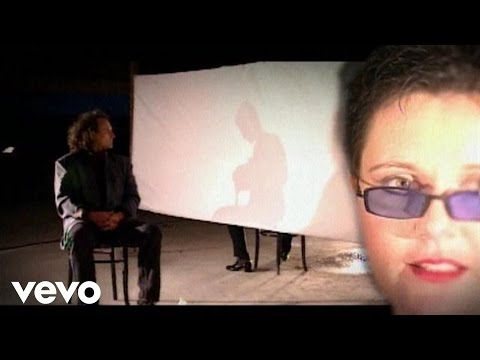

In [260]:
from IPython.display import YouTubeVideo
YouTubeVideo("P1gGTMYBvgk")

In [241]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt, mpld3
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

mpl.rc('image', interpolation='nearest', cmap='Set2')
mpld3.enable_notebook()

## As a timeline grid

In [242]:
all_half_beats = pd.read_csv('hladova-zed-half-beats.txt', header=None)[0]

In [243]:
le = LabelEncoder()
all_half_beats_numeric = le.fit_transform(all_half_beats)
all_half_beats_numeric

array([1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 6, 6, 1, 8, 2, 8, 1, 8, 2,
       8, 1, 8, 2, 8, 1, 8, 6, 6, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8,
       6, 6, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 6, 6, 0, 0, 0, 0, 3,
       3, 3, 3, 0, 0, 0, 0, 7, 7, 6, 6, 2, 2, 8, 8, 1, 1, 1, 1, 5, 5, 8, 1,
       2, 2, 2, 2, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 6, 6, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 4, 7, 7, 6, 6, 2, 2, 8, 8, 1, 1, 1, 1, 5, 5,
       8, 1, 2, 2, 2, 2, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1,
       8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 6, 6, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 4, 7, 7, 6, 6, 2, 2, 8, 8, 1, 1, 1, 1, 5, 5, 8, 1, 2, 2, 2,
       2, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8,
       2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1,
       8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8, 1, 8, 2, 8,
       1, 8, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2])

In [244]:
print('number of unique chords:', len(le.classes_))
print(le.classes_)

number of unique chords: 9
['Am6' 'Am7' 'Em' 'Em9' 'F#7' 'H4/C' 'H7' 'H7/4' 'Hm7']


In [245]:
section_lengths = [2,2,2,2,4,2,4,2,2,4,7,2,1]
assert sum(section_lengths)*8 == len(all_half_beats)

section_classes = [
    'intro',
    'intro',
    'verse_A',
    'verse_A',
    'chorus_A',
    'verse_A',
    'chorus_B',
    'verse_B',
    'solo',
    'chorus_B',
    'verse_C',
    'solo',
    'ending'
]
assert len(section_classes) == len(section_lengths)

In [246]:
section_starts = np.cumsum([0]+section_lengths)[:-1]

In [247]:
le_sections = LabelEncoder().fit(section_classes)
le_sections_numeric = le_sections.transform(section_classes)

In [248]:
row_size = 8
row_count = len(all_half_beats_numeric) // row_size

In [249]:
df = pd.DataFrame({'section': le_sections_numeric}, index=section_starts)
df = df.reindex(np.arange(row_count))
df.fillna(method='ffill', inplace=True)
df['section'] = df['section'].astype(int)
df
section_per_row = df['section']

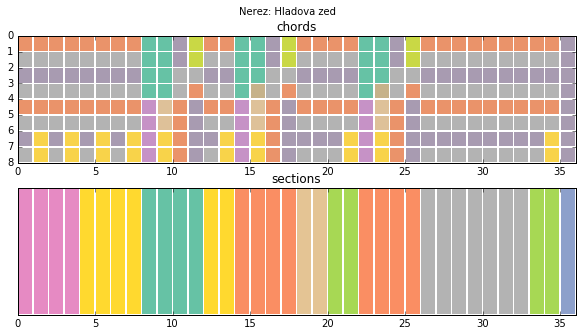

In [258]:
# time: first columns top to bottom, then rows left to right
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 5))

fig.suptitle('Nerez: Hladova zed')

ax1.set_xlim(0, row_count)
ax2.set_xlim(0, row_count)
values = all_half_beats_numeric.reshape(-1, 8).T
mesh = ax1.pcolormesh(values, edgecolors='w', linewidth=0.5)
ax1.set_title('chords')
ax1.invert_yaxis()

css = """
.mpld3-tooltip {
    background: white;
    padding: 5px;
    border-radius: 2px;
}
"""
labels = [le.inverse_transform(i) for i in values.flatten()]
tooltip = mpld3.plugins.PointHTMLTooltip(mesh, labels, hoffset=10, voffset=10, css=css)
mpld3.plugins.connect(fig, tooltip)


mesh2 = ax2.pcolormesh(section_per_row.reshape(1, -1), edgecolors='w', linewidth=0.5)
tooltip = mpld3.plugins.PointHTMLTooltip(
    mesh2,
    labels=[le_sections.inverse_transform(i) for i in section_per_row],
    hoffset=10, voffset=10, css=css)
mpld3.plugins.connect(fig, tooltip)
ax2.set_title('sections')
ax2.set_yticks([])

plt.savefig('hladova-zed-grid.pdf')

## n-grams

2-grams aligned to even indexes (ie. (0, 1) can be extracted, but (1,2) can not).

4-grams aligned to indexes modulo 4, etc.

In [229]:
def aligned_ngrams(values, n):
    return [tuple(values[i]) for i in np.arange(len(values)).reshape(-1, n)]

def aligned_ngram_set(values, n):
    return set(aligned_ngrams(values, n))

In [230]:
ngrams_1 = aligned_ngram_set(all_half_beats, 1)
ngrams_1

{('Am6',),
 ('Am7',),
 ('Em',),
 ('Em9',),
 ('F#7',),
 ('H4/C',),
 ('H7',),
 ('H7/4',),
 ('Hm7',)}

In [231]:
ngrams_2 = aligned_ngram_set(all_half_beats, 2)
ngrams_2

{('Am6', 'Am6'),
 ('Am6', 'F#7'),
 ('Am7', 'Am7'),
 ('Am7', 'Hm7'),
 ('Em', 'Em'),
 ('Em', 'Hm7'),
 ('Em9', 'Em9'),
 ('H4/C', 'H4/C'),
 ('H7', 'H7'),
 ('H7/4', 'H7/4'),
 ('Hm7', 'Am7'),
 ('Hm7', 'Hm7')}

In [232]:
ngrams_4 = aligned_ngram_set(all_half_beats, 4)
ngrams_4

{('Am6', 'Am6', 'Am6', 'Am6'),
 ('Am6', 'Am6', 'Am6', 'F#7'),
 ('Am7', 'Am7', 'Am7', 'Am7'),
 ('Am7', 'Hm7', 'Em', 'Hm7'),
 ('Am7', 'Hm7', 'H7', 'H7'),
 ('Em', 'Em', 'Em', 'Em'),
 ('Em', 'Em', 'Hm7', 'Hm7'),
 ('Em9', 'Em9', 'Em9', 'Em9'),
 ('H4/C', 'H4/C', 'Hm7', 'Am7'),
 ('H7/4', 'H7/4', 'H7', 'H7')}

In [233]:
ngrams_8 = aligned_ngram_set(all_half_beats, 8)
ngrams_8

{('Am6', 'Am6', 'Am6', 'Am6', 'Em9', 'Em9', 'Em9', 'Em9'),
 ('Am6', 'Am6', 'Am6', 'Am6', 'H7/4', 'H7/4', 'H7', 'H7'),
 ('Am6', 'Am6', 'Am6', 'F#7', 'H7/4', 'H7/4', 'H7', 'H7'),
 ('Am7', 'Hm7', 'Em', 'Hm7', 'Am7', 'Hm7', 'Em', 'Hm7'),
 ('Am7', 'Hm7', 'Em', 'Hm7', 'Am7', 'Hm7', 'H7', 'H7'),
 ('Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em'),
 ('Em', 'Em', 'Hm7', 'Hm7', 'Am7', 'Am7', 'Am7', 'Am7'),
 ('H4/C', 'H4/C', 'Hm7', 'Am7', 'Em', 'Em', 'Em', 'Em')}

In [234]:
for ngrams in ngrams_1, ngrams_2, ngrams_4, ngrams_8:
    print(len(ngrams))

9
12
10
8


## As a graph

In [235]:
from graphviz import Digraph

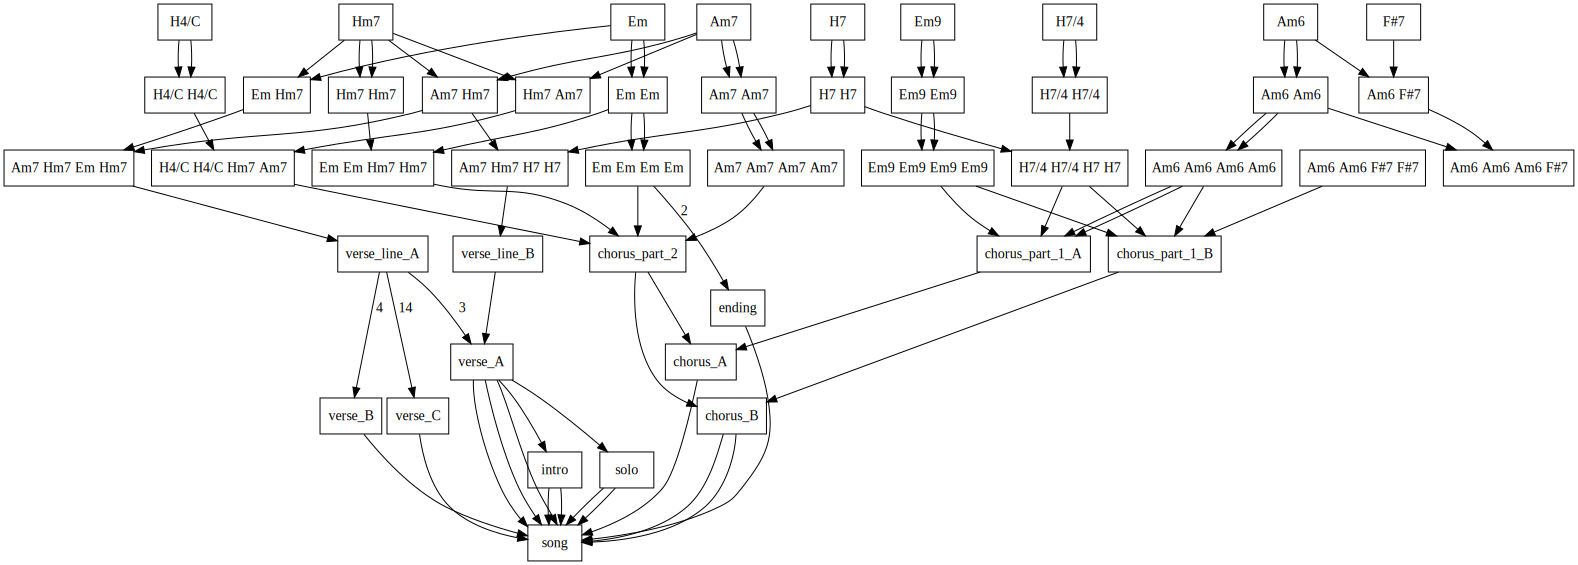

In [236]:
dot = Digraph()
dot.attr('node', shape='box')
for n in ngrams_1:
    dot.node(n[0])

def draw_ngram_layer(ngrams, n):
    for t in ngrams:
        node = ' '.join(t)
        dot.node(node)
        stride = n//2
        sources = [' '.join((t[stride*i:stride*(i+1)])) for i in range(2)]
        for src in sources:
            dot.edge(src, node)

draw_ngram_layer(ngrams_2, 2)
draw_ngram_layer(ngrams_4, 4)

dot.node('verse_line_A')
dot.edge('Am7 Hm7 Em Hm7', 'verse_line_A')
dot.edge('Am7 Hm7 H7 H7', 'verse_line_B')

dot.node('verse_A')
dot.edge('verse_line_A', 'verse_A', '3')
dot.edge('verse_line_B', 'verse_A')

dot.node('verse_B')
dot.edge('verse_line_A', 'verse_B', '4')

dot.node('intro')
dot.edge('verse_A', 'intro')

dot.node('solo')
dot.edge('verse_A', 'solo')

dot.node('chorus_part_1_A')
dot.edge(' '.join(4*['Am6']), 'chorus_part_1_A')
dot.edge(' '.join(4*['Em9']), 'chorus_part_1_A')
dot.edge(' '.join(4*['Am6']), 'chorus_part_1_A')
dot.edge(' '.join(2*['H7/4'] + 2*['H7']), 'chorus_part_1_A')

dot.node('chorus_part_1_B')
dot.edge(' '.join(4*['Am6']), 'chorus_part_1_B')
dot.edge(' '.join(4*['Em9']), 'chorus_part_1_B')
dot.edge(' '.join(2*['Am6'] + 2*['F#7']), 'chorus_part_1_B')
dot.edge(' '.join(2*['H7/4'] + 2*['H7']), 'chorus_part_1_B')

dot.node('chorus_part_2')
dot.edge(' '.join(2*['Em'] + 2*['Hm7']), 'chorus_part_2')
dot.edge(' '.join(4*['Am7']), 'chorus_part_2')
dot.edge(' '.join(2*['H4/C'] + ['Hm7', 'Am7']), 'chorus_part_2')
dot.edge(' '.join(4*['Em']), 'chorus_part_2')

dot.node('chorus_A')
dot.edge('chorus_part_1_A', 'chorus_A')
dot.edge('chorus_part_2', 'chorus_A')

dot.node('chorus_B')
dot.edge('chorus_part_1_B', 'chorus_B')
dot.edge('chorus_part_2', 'chorus_B')

dot.node('verse_C')
dot.edge('verse_line_A', 'verse_C', '14')

dot.node('ending')
dot.edge(' '.join(4*['Em']), 'ending', '2')

dot.node('song')
dot.edge('intro', 'song')
dot.edge('intro', 'song')
dot.edge('verse_A', 'song')
dot.edge('verse_A', 'song')
dot.edge('chorus_A', 'song')
dot.edge('verse_A', 'song')
dot.edge('chorus_B', 'song')
dot.edge('verse_B', 'song')
dot.edge('solo', 'song')
dot.edge('chorus_B', 'song')
dot.edge('verse_C', 'song')
dot.edge('solo', 'song')
dot.edge('ending', 'song')
    
dot.render('hladova-zed-graph.gv')
dot

## Sequence of 8-grams

In [237]:
le_8ngram = LabelEncoder().fit([' '.join(n) for n in ngrams_8])

In [238]:
all_ngrams_8 = [' '.join(n) for n in aligned_ngrams(all_half_beats, 8)]
all_ngrams_8

['Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 H7 H7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 H7 H7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 H7 H7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 H7 H7',
 'Am6 Am6 Am6 Am6 Em9 Em9 Em9 Em9',
 'Am6 Am6 Am6 Am6 H7/4 H7/4 H7 H7',
 'Em Em Hm7 Hm7 Am7 Am7 Am7 Am7',
 'H4/C H4/C Hm7 Am7 Em Em Em Em',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 H7 H7',
 'Am6 Am6 Am6 Am6 Em9 Em9 Em9 Em9',
 'Am6 Am6 Am6 F#7 H7/4 H7/4 H7 H7',
 'Em Em Hm7 Hm7 Am7 Am7 Am7 Am7',
 'H4/C H4/C Hm7 Am7 Em Em Em Em',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 H7 H7',
 'Am6 Am6 Am6 Am6 Em9 Em9 Em9 Em9',
 'Am6 Am6 Am6 F#7 H7/4 H7/4 H7 H7',
 'Em Em Hm7 Hm7 Am7 Am7 Am7 Am7',
 'H4/C H4/C Hm7 Am7 Em Em Em Em',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm7 Em Hm7 Am7 Hm7 Em Hm7',
 'Am7 Hm

In [239]:
all_ngrams_8_numeric = le_8ngram.transform(all_ngrams_8)

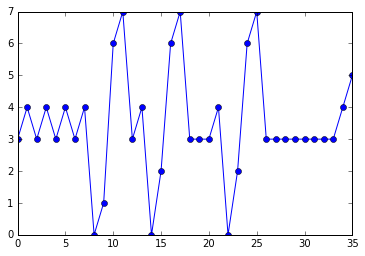

In [240]:
plt.plot(all_ngrams_8_numeric, 'o-');